In [3]:
import pandas as pd

In [61]:
MODEL_SELECTOR = "GT_TEST"
NUM_STEPS      = 14
FREQ           = "0.5"

In [62]:
reports_path = f'./{MODEL_SELECTOR}/reports'

final_report = f'{reports_path}/F1_final_REPORT.csv' 

reports = []
for i in range(NUM_STEPS):
    #print(f'LOADING HARDEN STEP [{i}]')
    file_name = f'{reports_path}/F1_REPORT_{MODEL_SELECTOR}_STEP_{i}_{FREQ}.csv'
    data = pd.read_csv(file_name,sep=';',decimal=",",header=None)[[0,1,6]]
    data = data.rename(columns={0: "harden_step", 1: "layer_name", 6:"robustness"})
    data['harden_step'] = i
    reports.append(data)
    
reports = pd.concat(reports)

reports.head()

,harden_step,layer_name,robustness
0,0,batch_normalization_3,0.544762
1,0,batch_normalization_5,0.672381
2,0,batch_normalization_6,0.620952
3,0,batch_normalization_7,0.561905
4,0,batch_normalization_8,0.537143


In [111]:
robustness_evolving = reports.pivot(index='layer_name', columns=['harden_step'])['robustness'].reset_index()
robustness_evolving.head(24)

harden_step,layer_name,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,batch_normalization_20,0.617143,0.567619,0.697143,0.697143,0.640000,0.697143,0.678095,0.721905,0.668571,0.740952,0.687619,0.712381,0.678095,0.750476
1,batch_normalization_3,0.544762,0.539048,0.563810,0.600000,0.594286,0.613333,0.636190,0.664762,0.693333,0.685714,0.651429,0.668571,0.653333,0.706667
2,batch_normalization_30,0.725714,0.752381,0.826667,0.840000,0.800000,0.782857,0.779048,0.780952,0.786667,0.864762,0.779048,0.704762,0.834286,0.819048
3,batch_normalization_4,NaN,0.590476,0.611429,0.598095,0.657143,0.603810,0.674286,0.678095,0.718095,0.685714,0.683810,0.649524,0.672381,0.676190
4,batch_normalization_40,0.611429,0.647619,0.718095,0.739048,0.695238,0.687619,0.697143,0.702857,0.714286,0.784762,0.714286,0.712381,0.744762,0.742857
5,batch_normalization_5,0.672381,0.662857,0.760000,0.710476,0.765714,0.693333,0.760000,0.784762,0.836190,0.801905,0.803810,0.779048,0.761905,0.813333
6,batch_normalization_50,0.742857,0.580952,0.834286,0.813333,0.773333,0.775238,0.748571,0.819048,0.739048,0.773333,0.820952,0.773333,0.813333,0.828571
7,batch_normalization_6,0.620952,0.647619,0.660952,0.718095,0.723810,0.638095,0.720000,0.779048,0.828571,0.800000,0.788571,0.716190,0.801905,0.822857
8,batch_normalization_60,0.626667,0.626667,0.752381,0.678095,0.676190,0.660952,0.769524,0.695238,0.737143,0.676190,0.752381,0.718095,0.708571,0.779048
9,batch_normalization_7,0.561905,0.600000,0.676190,0.744762,0.680000,0.643810,0.721905,0.723810,0.796190,0.775238,0.706667,0.691429,0.782857,0.800000


In [112]:
robustness_evolving.columns

Index(['layer_name', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='object', name='harden_step')

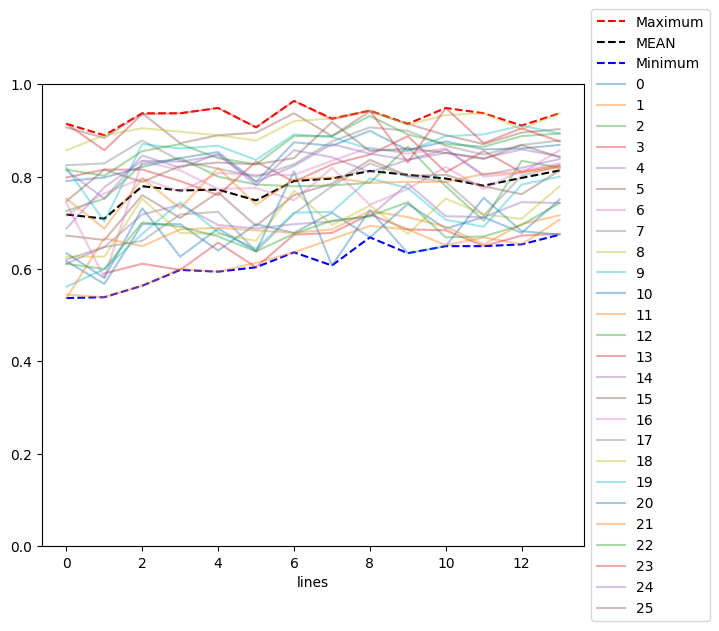

In [113]:
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize=(7, 6))
robustness_evolving.max().T.plot(ax=ax,color='r', linestyle='--',label="Maximum")
robustness_evolving.mean().T.plot(ax=ax,color='black', linestyle='--',label = "MEAN")
robustness_evolving.min().T.plot(ax=ax,color='b', linestyle='--', label="Minimum")

robustness_evolving.T.plot(ax=ax, alpha=0.4,label="None").legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.ylim([0, 1])
plt.show()